<a href="https://colab.research.google.com/github/Davies234/PORTFOLIO-PROJECTS/blob/main/Economic_Analysis_with_Python_and_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fredapi > /dev/null

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/secrets/fred_api.txt') as f:
 fred_key = f.read().strip()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
pd.set_option('display.max_columns',500)

from fredapi import Fred

In [6]:
fred = Fred(api_key=fred_key)

In [7]:
#search for economic data
sp_search = fred.search('S&P',order_by = 'popularity')

In [8]:
sp_search.shape

(1000, 15)

In [9]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P500'}>

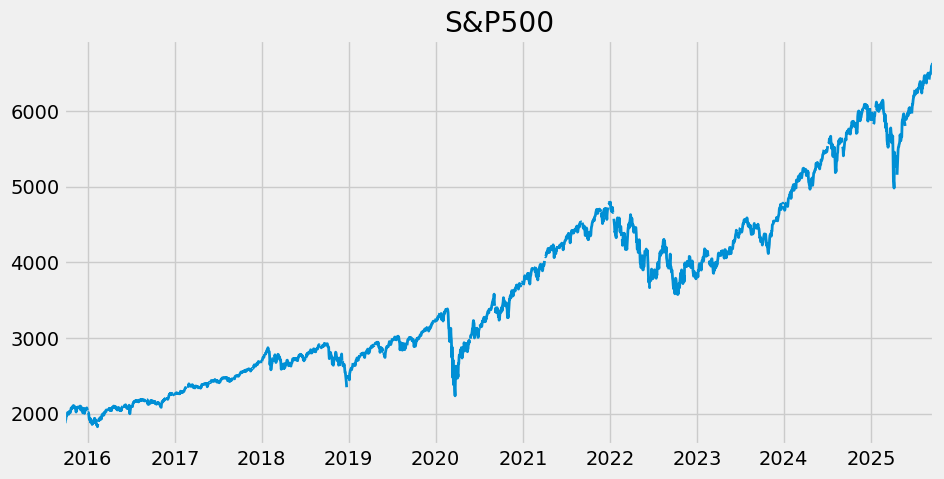

In [10]:
sp500.plot(figsize=(10,5), title='S&P500', lw = 2)

In [11]:
#pull and merge different Data Series and compare
unemploymentresult = fred.search('unemployment',)

In [12]:
unemploymentresult

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-09-24,2025-09-24,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-09-05 07:51:01-05:00,98,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-09-24,2025-09-24,Unemployment Rate,1948-01-01,2025-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-09-05 07:50:03-05:00,61,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-09-24,2025-09-24,Unemployment Level,1948-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-09-05 07:51:04-05:00,74,The series comes from the 'Current Population ...
CCSA,CCSA,2025-09-24,2025-09-24,Continued Claims (Insured Unemployment),1967-01-07,2025-09-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-09-18 07:33:02-05:00,75,"Continued claims, also referred to as insured ..."
NROU,NROU,2025-09-24,2025-09-24,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC151840510SA,ENUC151840510SA,2025-09-24,2025-09-24,Average Weekly Wages for Employees in Private ...,1990-01-01,2025-01-01,Quarterly,Q,Dollars per Week,$ per Week,Seasonally Adjusted,SA,2025-09-09 11:27:35-05:00,1,Average weekly wages are the wages paid by une...
ENUC151840510,ENUC151840510,2025-09-24,2025-09-24,Average Weekly Wages for Employees in Private ...,1990-01-01,2025-01-01,Quarterly,Q,Dollars per Week,$ per Week,Not Seasonally Adjusted,NSA,2025-09-09 11:22:14-05:00,1,Average weekly wages are the wages paid by une...
CGDDL25O,CGDDL25O,2025-09-24,2025-09-24,Civilian Labor Force - College Graduates - Doc...,2000-01-01,2025-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-09-05 08:46:02-05:00,1,The civilian labor force is the sum of employe...


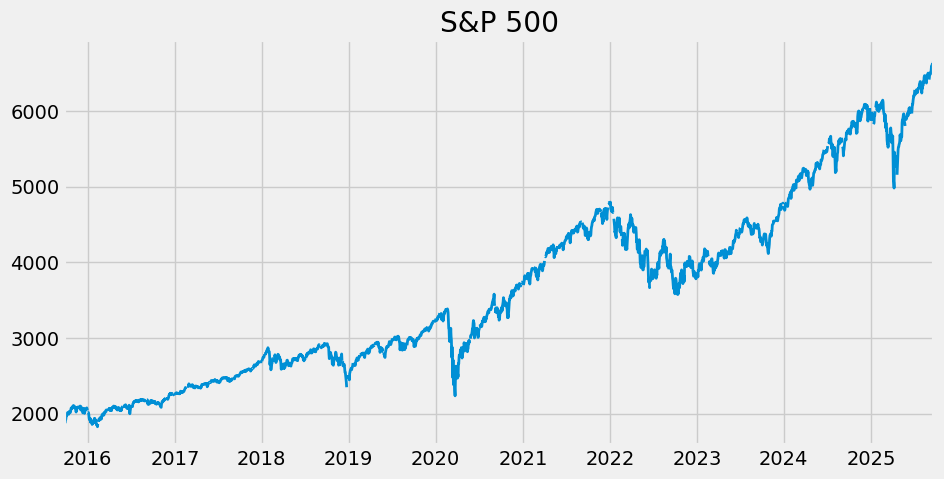

In [13]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [14]:
unrate=fred.get_series('UNRATE')

In [15]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [28]:
import time

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [29]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [30]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [31]:
# Plot States Unemployment Rate
px.line(uemp_states)

In [22]:
## Pull April 2020 unemploymen Rate per State

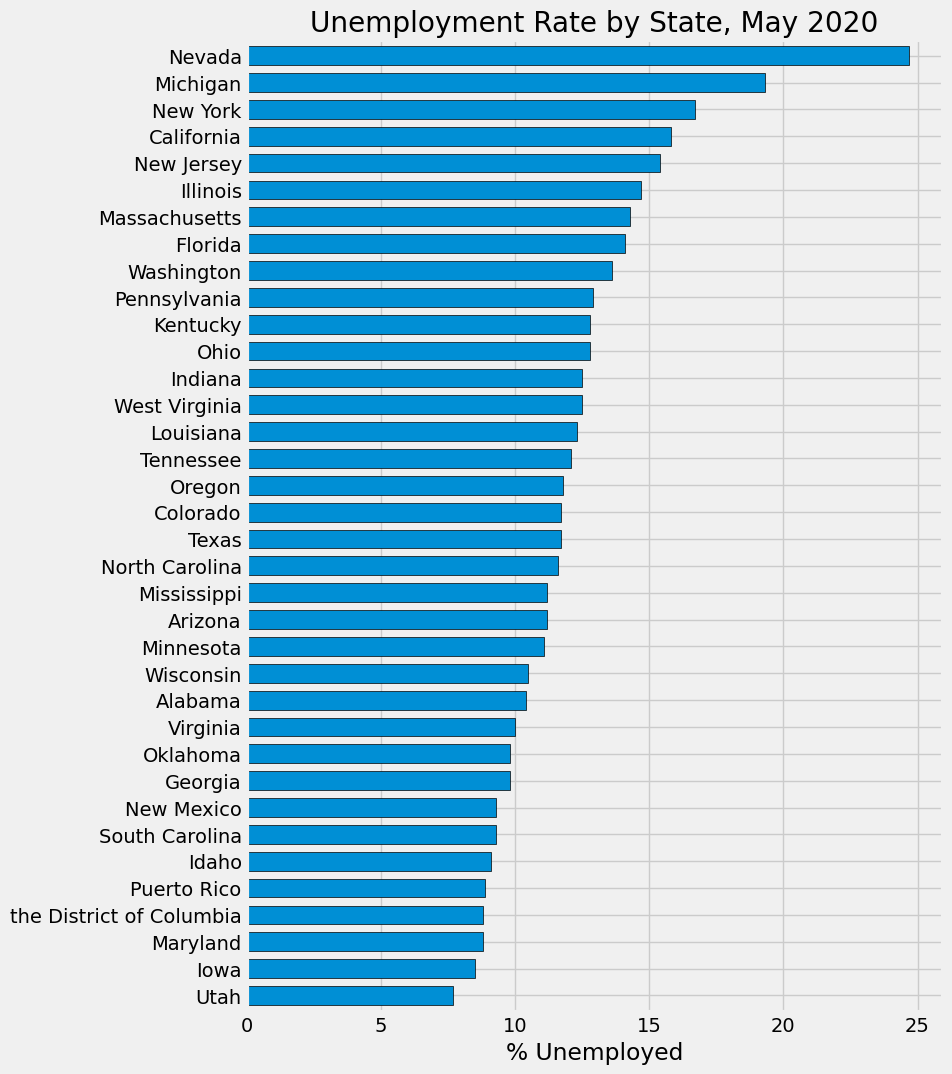

In [34]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [45]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [46]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [47]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

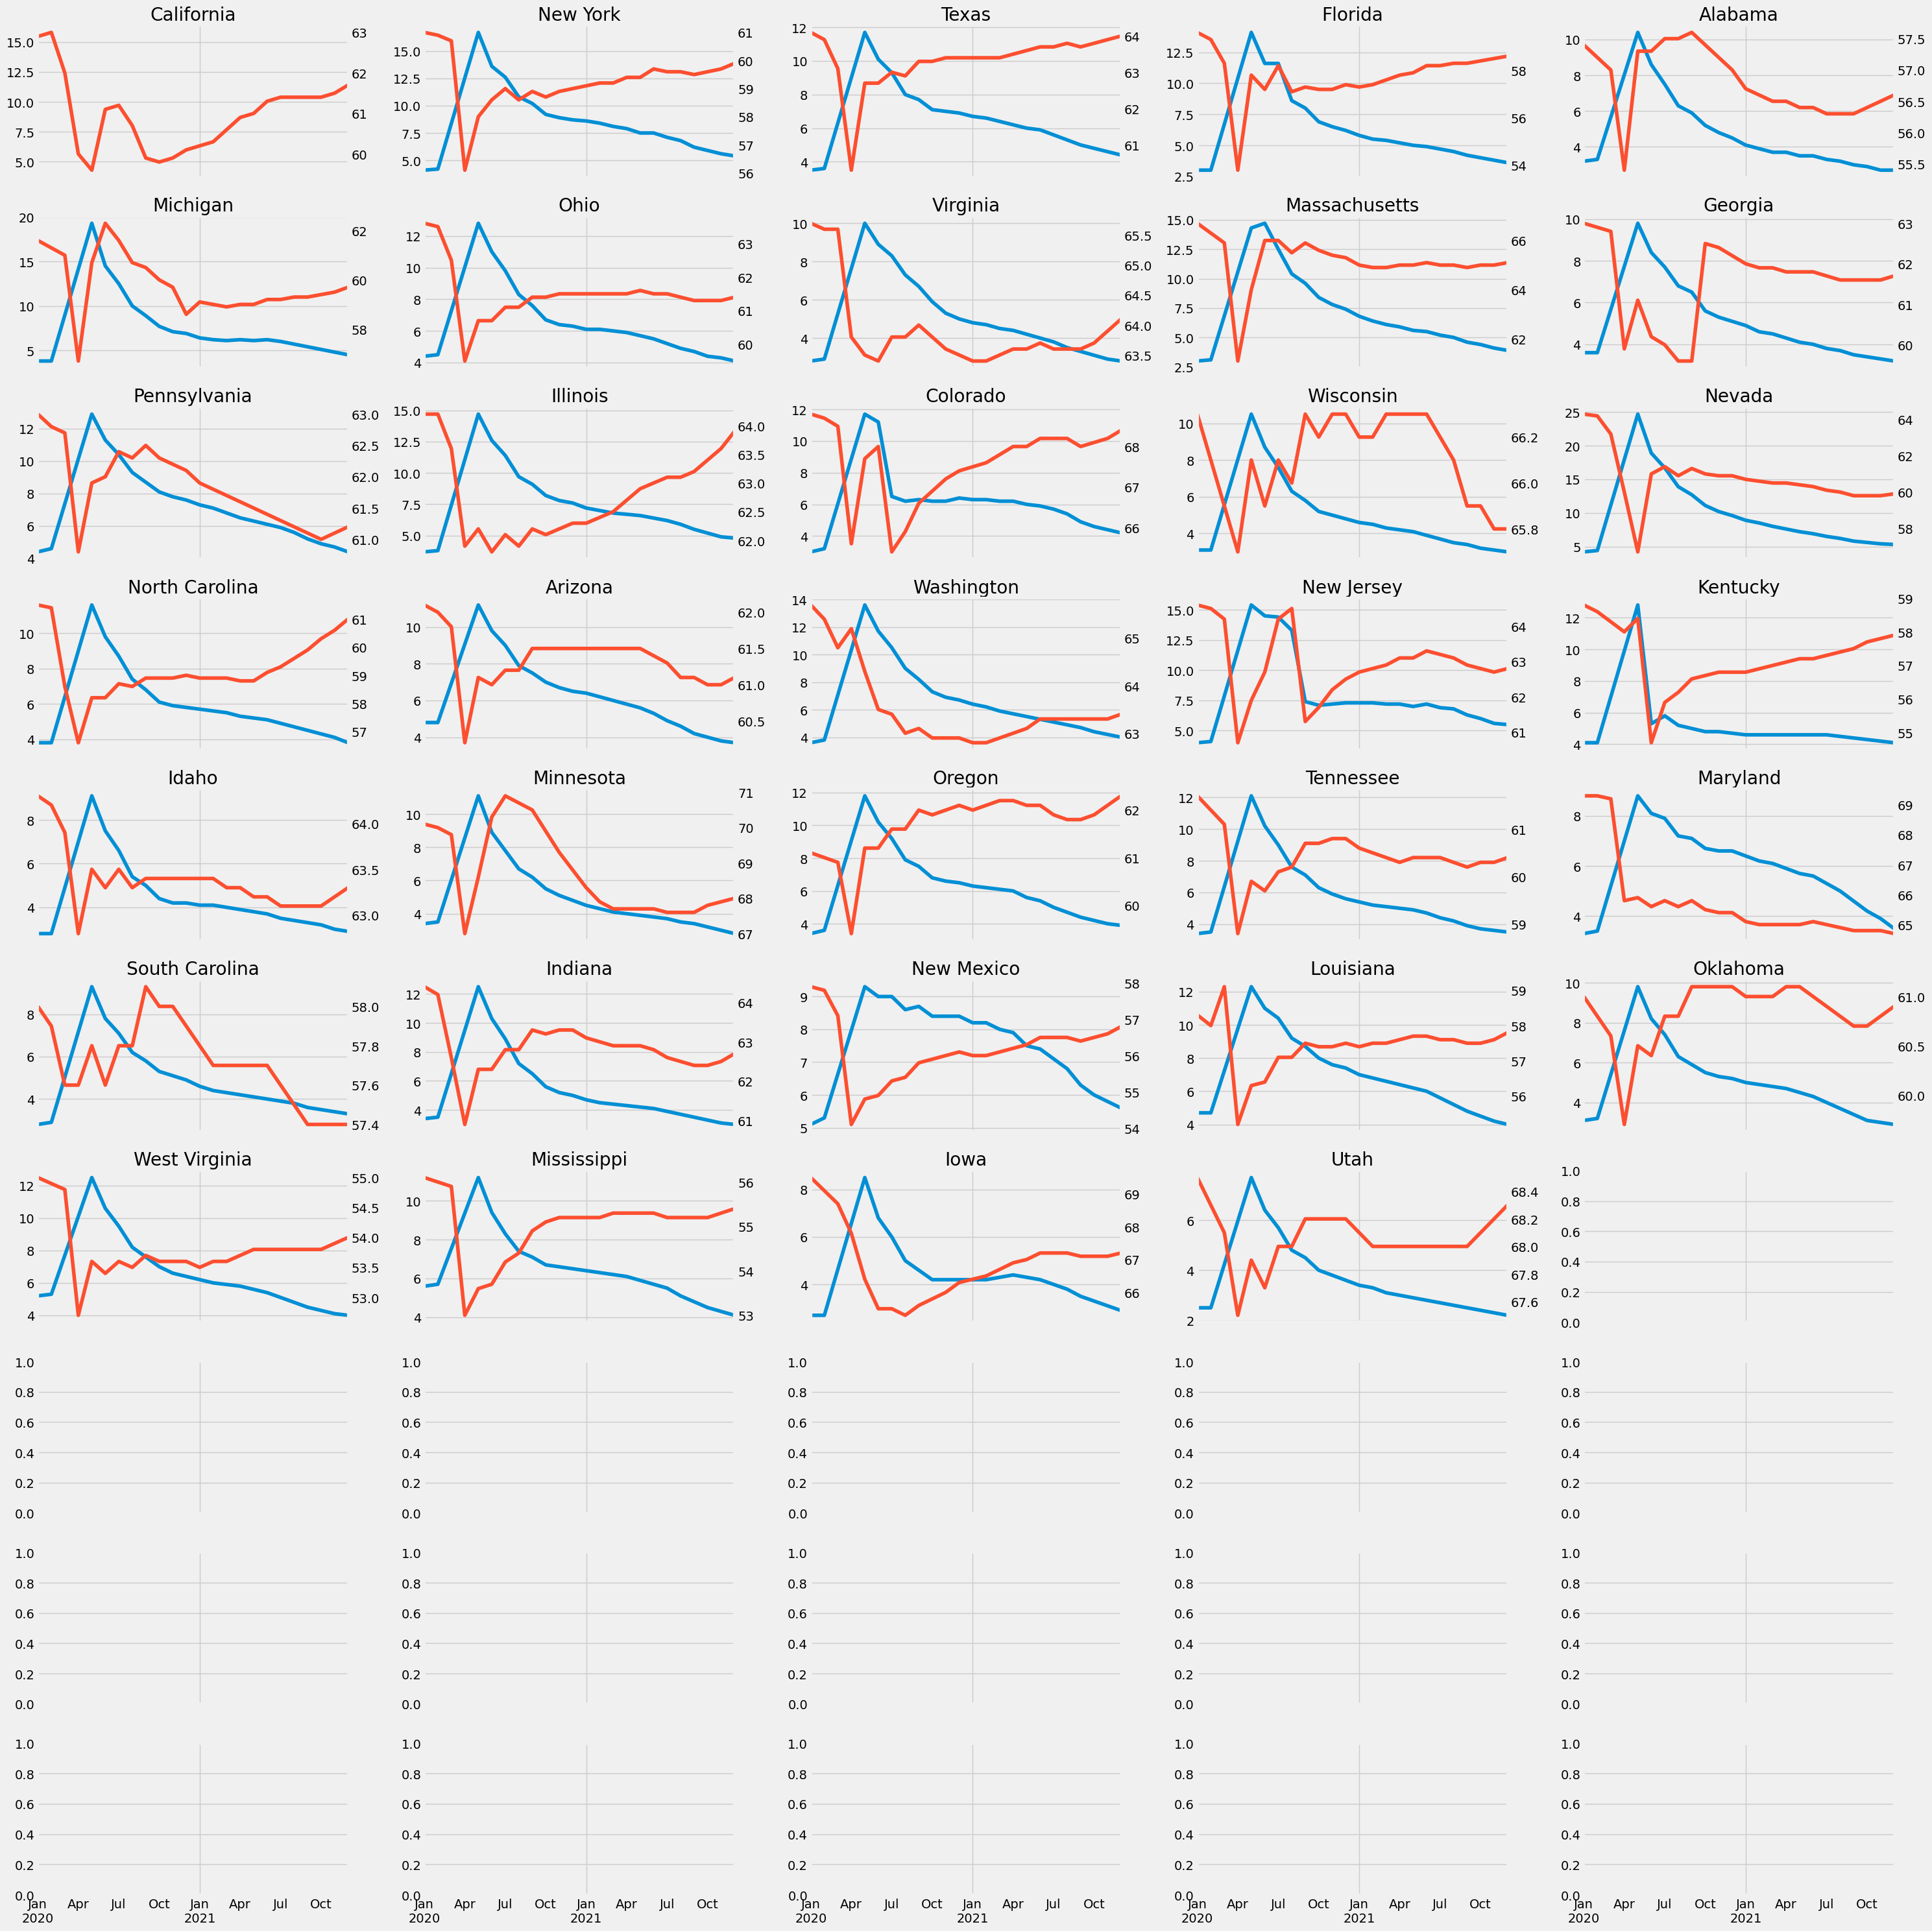

In [48]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

In [48]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()